In [1]:
%%bash
# Install the Reinforcement Learning stack
pip install -q gymnasium stable-baselines3 shimmy gymnasium[other]

# Install Financial Data & Technical Analysis libraries
pip install -q yfinance pandas-ta matplotlib

# Install the Trading Environment
pip install -q gym-anytrading


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 136.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 6.5 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/tmp/ipython-input-2961425017.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2024-01-01")


--- Step 1: Loading Data ---


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
[*********************100%***********************]  1 of 1 completed/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return dateti

--- Step 2: Adding Technical Indicators ---
Data ready: 2177 rows loaded.

--- Step 3: Training the Agent (this may take a minute) ---
Using cuda device


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetim

-----------------------------
| time/              |      |
|    fps             | 521  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 473         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014586913 |
|    clip_fraction        | 0.0458      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.683      |
|    explained_variance   | -8.58e-06   |
|    learning_rate        | 0.0003      |
|    loss                 | 1.26e+06    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00316    |
|    value_loss           | 4.4e+06     |
-----------------------------------------
----------------------------------

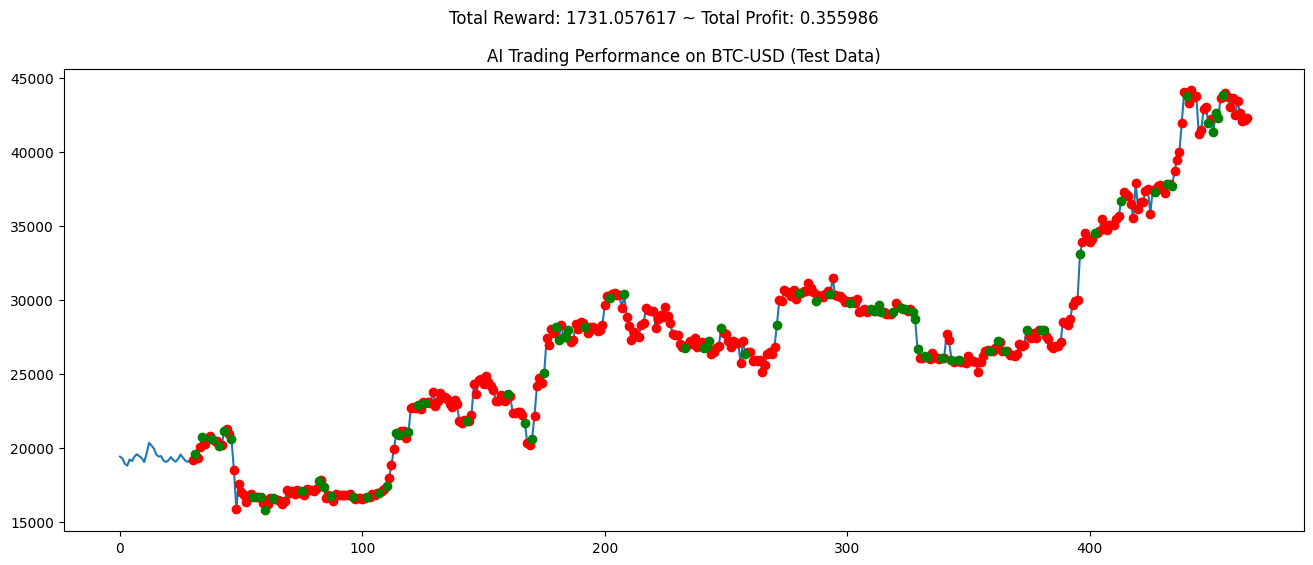

In [2]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import gymnasium as gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import matplotlib.pyplot as plt


# 1. DATA LOADING & FEATURE ENGINEERING

print("--- Step 1: Loading Data ---")
ticker = "BTC-USD"
# Download more data for better training
df = yf.download(ticker, start="2018-01-01", end="2024-01-01")

# Fix for multi-index columns in newer yfinance versions
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Feature Engineering: Add "Vision" to the agent
print("--- Step 2: Adding Technical Indicators ---")
# SMA: Simple Moving Average (Trend)
df['SMA_15'] = ta.sma(df['Close'], length=15)
# RSI: Relative Strength Index (Momentum)
df['RSI'] = ta.rsi(df['Close'], length=14)

# Drop NaN values generated by indicators
df.dropna(inplace=True)
print(f"Data ready: {len(df)} rows loaded.")



# 2. CUSTOM ENVIRONMENT SETUP

def my_process_data(env):
    """
    Custom processor to include RSI and SMA in the observation space.
    By default, gym-anytrading only sees price and diff. We add our indicators here.
    """
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Close'].to_numpy()[start:end]

    # The 'signal_features' is what the AI "sees" at every step
    # We include Close price, RSI, and SMA_15
    signal_features = env.df.loc[:, ['Close', 'RSI', 'SMA_15']].to_numpy()[start:end]
    return prices, signal_features

# Create the training environment
# We wrap it in a DummyVecEnv which is required for Stable Baselines3
window_size = 30
train_env = gym.make(
    'stocks-v0',
    df=df,
    window_size=window_size,
    frame_bound=(window_size, int(len(df) * 0.8)) # Train on first 80%
)

# Apply our custom feature extractor (Monkey patching the environment)
train_env.unwrapped._process_data = my_process_data.__get__(train_env.unwrapped, StocksEnv)
train_env = DummyVecEnv([lambda: train_env])



# 3. TRAIN THE AGENT (PPO)

print("\n--- Step 3: Training the Agent (this may take a minute) ---")
# MlpPolicy: Multi-Layer Perceptron (standard Neural Network)
model = PPO("MlpPolicy", train_env, verbose=1, learning_rate=0.0003)

# Train for 50,000 timesteps (Increase this to 1M+ for a "real" bot)
model.learn(total_timesteps=50000)
print("Training finished!")

# Save the model
model.save("ppo_trading_bot")



# 4. BACKTESTING & VISUALIZATION

print("\n--- Step 4: Testing on Unseen Data ---")

# Create a separate testing environment using the remaining 20% of data
test_env = gym.make(
    'stocks-v0',
    df=df,
    window_size=window_size,
    frame_bound=(int(len(df) * 0.8), len(df)) # Test on last 20%
)
# Apply the same custom features to the test env
test_env.unwrapped._process_data = my_process_data.__get__(test_env.unwrapped, StocksEnv)

obs, info = test_env.reset()

while True:
    # Predict the action (Buy/Sell/Hold) based on observation
    action, _states = model.predict(obs)

    # Step through the environment
    obs, rewards, terminated, truncated, info = test_env.step(action)

    if terminated or truncated:
        print("\n--- Final Results ---")
        print(f"Total Profit: {info['total_profit']:.2f}")
        print(f"Total Reward: {info['total_reward']:.2f}")
        break

# Plot the results
plt.figure(figsize=(16, 6))
plt.cla()
test_env.unwrapped.render_all()
plt.title(f"AI Trading Performance on {ticker} (Test Data)")
plt.show()